# NumPy-demo: Linear Regression

## 라이브러리 import 및 설정

In [1]:
# pip install pytest-warnings

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [4]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

## 학습데이터 로드

In [5]:
data_dir = Path('C:\DACON\dataset')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 12

In [6]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)

trn = trn.dropna(axis=0)
print(trn.shape) 

trn.describe()

(1459, 10)
(1328, 10)


,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1328.0000,1328.0000,1328.0000,1328.0000,1328.0000,1328.0000,1328.0000,1328.0000,1328.0000,1328.0000
mean,11.9051,16.8660,0.0301,2.4898,51.7410,1413.6551,0.0391,57.4812,30.3825,110.8050
std,6.7469,5.1965,0.1710,1.3828,20.1671,577.2587,0.0194,31.2211,14.7408,82.9006
min,0.0000,3.1000,0.0000,0.0000,7.0000,78.0000,0.0030,9.0000,8.0000,1.0000
25%,6.0000,13.0000,0.0000,1.4000,36.0000,899.0000,0.0260,36.0000,20.0000,37.0000
50%,12.0000,16.8000,0.0000,2.4000,50.0000,1581.5000,0.0385,52.0000,26.0000,100.5000
75%,18.0000,20.2000,0.0000,3.4000,68.0000,1993.2500,0.0520,70.0000,37.0000,153.0000
max,23.0000,30.0000,1.0000,8.0000,99.0000,2000.0000,0.1250,269.0000,90.0000,431.0000


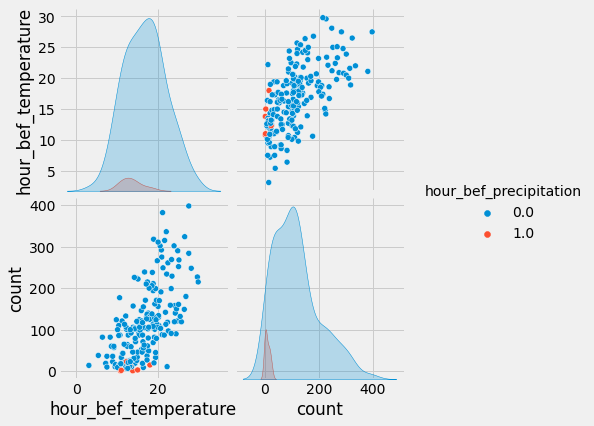

In [7]:
sns.pairplot(trn.sample(n=200), vars=['hour_bef_temperature', 'count'], hue='hour_bef_precipitation', size=3)

In [8]:
x = trn['hour_bef_temperature'].values
y = trn['count'].values
print(x.shape, y.shape)

(1328,) (1328,)


## RMSE 손실함수 정의

In [9]:
rmse = lambda y, p: np.sqrt(np.mean(y-p)**2)

## NumPy를 이용한 linear regression

In [10]:
alpha = 0.001
theta0 = .1
theta1 = .1
epoch = 100

In [11]:
# import math

rmses = []
for i in tqdm(range(epoch)):
    for xi, yi in zip(x,y):
        pi = theta0 + theta1 * xi
        # print (pi, '=', theta0, '+', theta1 , '*', xi)
        theta0 = theta0 + alpha * (yi - pi)
        theta1 = theta1 + alpha * (yi - pi) * xi
    rmses.append(rmse(y, theta0 + theta1 * x))



  0%|          | 0/100 [00:00<?, ?it/s]

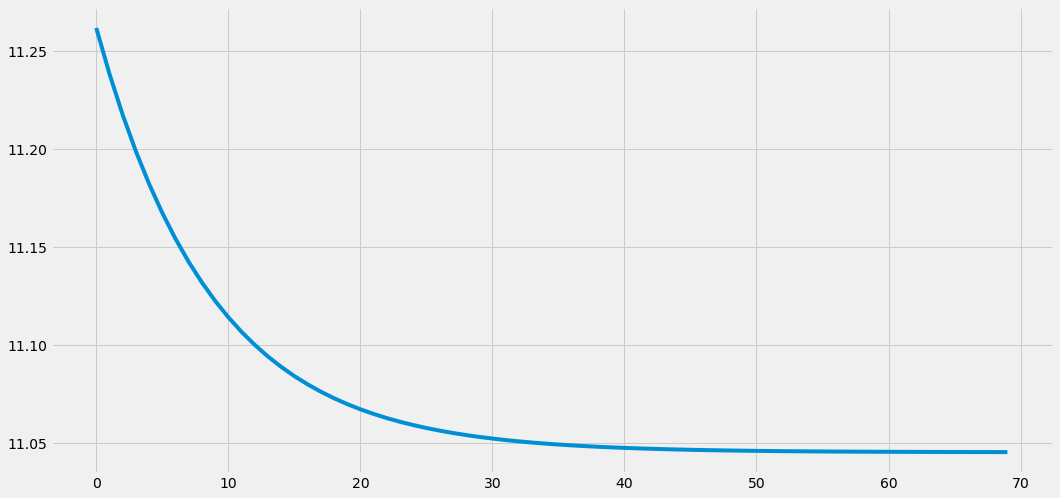

In [12]:
plt.plot(rmses[30:])

Text(0, 0.5, 'count')

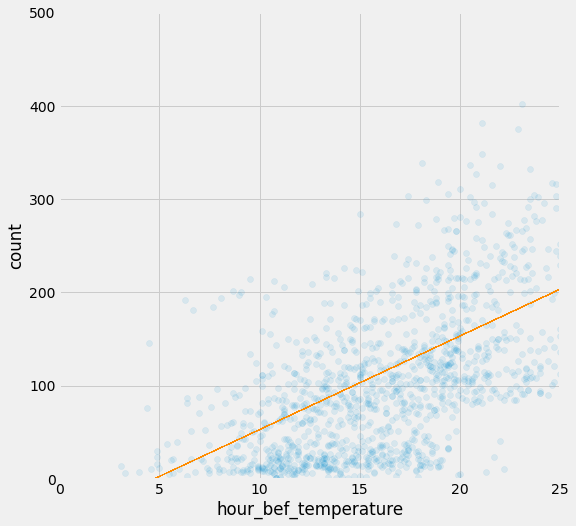

In [13]:
plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=.1)
plt.plot(x, theta0 + theta1 * x, color='darkorange', linewidth=.5)
plt.xlim(0, 25)
plt.ylim(0, 500)
plt.xlabel('hour_bef_temperature')
plt.ylabel('count')

## scikit-learn을 이용한 linear regression

In [14]:
X = trn[['hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity']].values
# LinearRegression() needs 2-D input X 

X2 = np.reshape(x, (len(x), -1))
print(X2.shape)

(1328, 1)


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X2, y)
p = lr.predict(X2)

In [16]:
rmse(y,p)

6.334959330873182e-15

In [17]:
lr.coef_, lr.intercept_

(array([9.73843067]), -53.443783149959074)

In [18]:
X[:,0].shape

(1328,)

Text(0, 0.5, 'count')

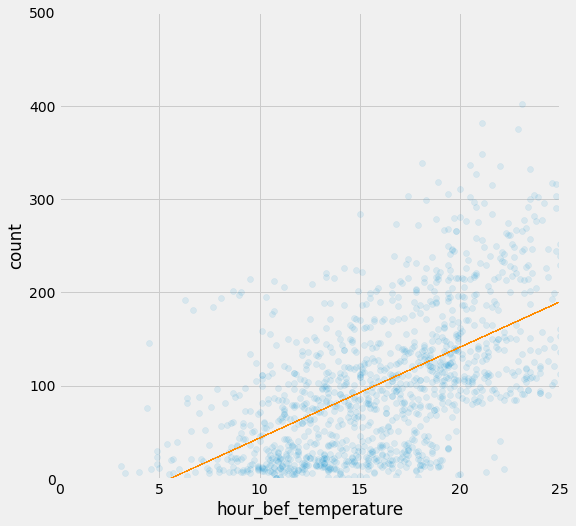

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(X2, y, alpha=.1)
plt.plot(X2, p, color='darkorange', linewidth=.5)
plt.xlim(0, 25)
plt.ylim(0, 500)
plt.xlabel('hour_bef_temperature')
plt.ylabel('count')

## scikit-learn을 이용한 logistic regression

In [20]:
X = trn.drop('hour_bef_precipitation', axis=1)
y = trn['hour_bef_precipitation'].values

In [21]:
np.unique(y)

array([0., 1.])

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X, y)
p = lr.predict_proba(X)[:, 1]

In [26]:
lr.coef_, lr.intercept_

(array([[ 0.20842682,  0.01490258,  0.10966885,  0.00812553, -0.00205445,
         -0.00033082, -0.01779298, -0.03862229, -0.03836107]]),
 array([-0.01981609]))

In [27]:
log_loss(y, p)

0.07990557333533378

In [28]:
roc_auc_score(y, p)

0.9266110248447205